# Data Collection and Processing

In [1040]:
# Pre-load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as gp
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [1041]:
# Load the data

df = pd.read_csv('googleplaystore.csv')
df.head(n=5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [1042]:
# List all columns

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [1043]:
# Rename columns to ensure better usage and readability

df.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Version',
       'Android_Version']

In [1044]:
# Show renamed columns

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Version',
       'Android_Version'],
      dtype='object')

In [1045]:
# Find total number of rows and columns in the original DF

print('Number of Rows: ', len(df.index))
print('Number of Columns: ', len(df.columns))

Number of Rows:  10841
Number of Columns:  13


In [1046]:
# Find nulls in all columns

df.isnull().sum()

App                   0
Category              0
Rating             1474
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content_Rating        1
Genres                0
Last_Updated          0
Current_Version       8
Android_Version       3
dtype: int64

In [1047]:
# Drop nulls 

df.dropna(axis=0, inplace=True)
df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content_Rating     0
Genres             0
Last_Updated       0
Current_Version    0
Android_Version    0
dtype: int64

In [1048]:
# Find duplicates in App column - there are duplicates with different number of Reviews

df.groupby(['App'])['App'].count().reset_index(name='count').sort_values(by=['count'], ascending=False).head(n=5)

,App,count
6109,ROBLOX,9
1574,"CBS Sports App - Scores, News, Stats & Watch Live",8
1894,Candy Crush Saga,7
2860,Duolingo: Learn Languages Free,7
3008,ESPN,7


In [1049]:
# Drop duplicate App records

df = df.sort_values('Reviews').drop_duplicates(subset=['App'], keep='last').reset_index(drop=True)
df.head(n=5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
0,Food-Aw - Order Food Online in Aruba,FOOD_AND_DRINK,5.0,1,24M,100+,Free,0,Everyone,Food & Drink,"April 5, 2018",10,4.1 and up
1,House party - live chat,DATING,1.0,1,9.2M,10+,Free,0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up
2,CB Fit,HEALTH_AND_FITNESS,5.0,1,7.8M,10+,Free,0,Everyone,Health & Fitness,"July 9, 2018",4.2.2,4.1 and up
3,UK Girls Mobile Numbers,DATING,3.0,1,5.5M,500+,Free,0,Mature 17+,Dating,"July 19, 2018",1.0,4.0.3 and up
4,FK CLASSIC FOR YOU,BUSINESS,5.0,1,3.5M,10+,Free,0,Everyone,Business,"February 20, 2018",1.1.0,4.0 and up


In [1050]:
# Remove the '$' and ',' characters from the df['Price'] feature

df.Price.replace('\$|\,', '', regex=True, inplace=True)

In [1051]:
df[df['Type'] == 'Paid'].Price

7       4.99
9       4.99
18      0.99
21      0.99
23      1.49
        ... 
8089    2.99
8097    2.99
8105    0.99
8106    2.99
8130    2.49
Name: Price, Length: 602, dtype: object

In [1052]:
# Remove the '+' and ',' characters from the df['Installs'] feature

df.Installs.replace('\+|\,', '', regex=True, inplace=True)

In [1053]:
df['Installs']

0           100
1            10
2            10
3           500
4            10
         ...   
8185     500000
8186    1000000
8187    1000000
8188     100000
8189    1000000
Name: Installs, Length: 8190, dtype: object

In [1054]:
# Replace the string "Varies with device" in the df['Size'] feature with NaNs

df.Size.replace('Varies with device', np.nan, regex=True, inplace=True)

In [1055]:
# Check if the string has been correctly replaced by NaNs

df[df['Size'].isna()].head(n=3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
44,FAST EO,EVENTS,5.0,1,NaN,10,Free,0,Everyone,Events,"May 15, 2018",1.0.3,4.1 and up
83,ES Anywhere,BUSINESS,4.7,10,NaN,100,Free,0,Everyone,Business,"April 28, 2017",Varies with device,4.0.3 and up
123,The real aquarium - HD,PERSONALIZATION,4.3,100130,NaN,5000000,Free,0,Everyone,Personalization,"June 25, 2018",Varies with device,Varies with device


In [1056]:
# Add a column 'Size_multiplier' to convert all Size values to the same unit (MB)

df["Size_multiplier"] = np.nan

for i in range(0,len(df)):
    if(df.Size.str.contains('k')[i] == True):
        df["Size_multiplier"][i] = 1/1000
    else:
        df["Size_multiplier"][i] = 1

In [1057]:
# Remove the 'M' and 'k' characters from the df['Size'] feature

df.Size.replace('M', '', regex=True, inplace=True)
df.Size.replace('k', '', regex=True, inplace=True)

In [1058]:
# Convert all Size values to the same unit (MB)

df = df.astype({"Size": float, "Size_multiplier": float})
df.Size = df.Size * df.Size_multiplier

df = df.drop(columns='Size_multiplier')

In [1059]:
# Check data types of all columns

df.dtypes

App                 object
Category            object
Rating             float64
Reviews             object
Size               float64
Installs            object
Type                object
Price               object
Content_Rating      object
Genres              object
Last_Updated        object
Current_Version     object
Android_Version     object
dtype: object

In [1060]:
# Convert relevant columns to numeric data types to make them usable

df = df.astype({"Price": float, "Installs": int, "Reviews": int})
df.dtypes

App                 object
Category            object
Rating             float64
Reviews              int64
Size               float64
Installs             int64
Type                object
Price              float64
Content_Rating      object
Genres              object
Last_Updated        object
Current_Version     object
Android_Version     object
dtype: object

In [1061]:
# Final number of rows and columns of pre-processed data

print('Number of Rows: ', len(df.index))
print('Number of Columns: ', len(df.columns))

Number of Rows:  8190
Number of Columns:  13


In [1062]:
# Final pre-processed data frame

df.head(n=5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
0,Food-Aw - Order Food Online in Aruba,FOOD_AND_DRINK,5.0,1,24.0,100,Free,0.0,Everyone,Food & Drink,"April 5, 2018",10,4.1 and up
1,House party - live chat,DATING,1.0,1,9.2,10,Free,0.0,Mature 17+,Dating,"July 31, 2018",3.52,4.0.3 and up
2,CB Fit,HEALTH_AND_FITNESS,5.0,1,7.8,10,Free,0.0,Everyone,Health & Fitness,"July 9, 2018",4.2.2,4.1 and up
3,UK Girls Mobile Numbers,DATING,3.0,1,5.5,500,Free,0.0,Mature 17+,Dating,"July 19, 2018",1.0,4.0.3 and up
4,FK CLASSIC FOR YOU,BUSINESS,5.0,1,3.5,10,Free,0.0,Everyone,Business,"February 20, 2018",1.1.0,4.0 and up


# Data Exploration & Visualization

### 1) Top 5 App Categories based on Number of Installations 

In [1063]:
# Group by category and order by sum of installs

df_install_byCat = df.groupby(by='Category').sum().sort_values(by = 'Installs', ascending = False).head(n=5)[['Installs']]
df_install_byCat

,Installs
Category,
GAME,13387762717
COMMUNICATION,11038241530
TOOLS,8000224500
FAMILY,6231030590
PRODUCTIVITY,5793070180


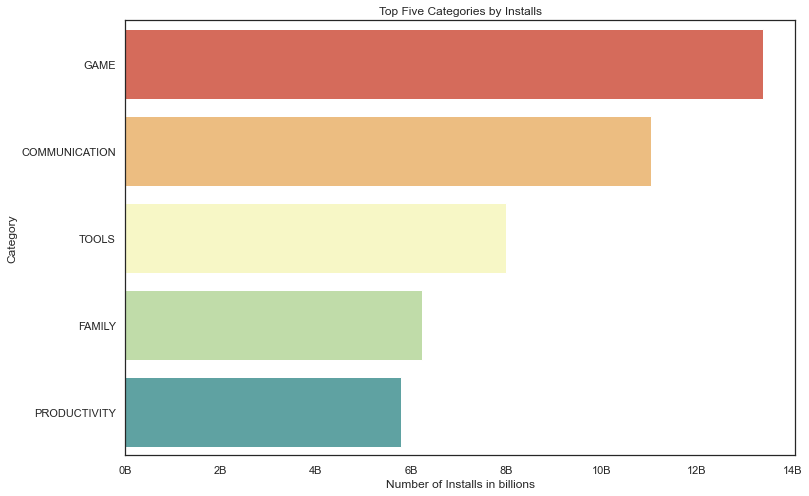

In [1064]:
plt.figure(figsize=(12,8))

sns.set_theme(style="white")
b = sns.barplot(data=df_install_byCat, x='Installs', y=df_install_byCat.index, orient='h', palette='Spectral')

plt.title('Top Five Categories by Installs')
xlabels = ['{:,.0f}'.format(x) + 'B' for x in b.get_xticks()/1000000000]
b.set_xticklabels(xlabels)
plt.xlabel('Number of Installs in billions')
plt.ylabel('Category')

plt.show()

#### Observations:

* From the chart we can see that **most apps downloaded** on Playstore are either **Games or Communication** based. 
* This is a great representation because entertainment is top priority and communication services like Whatsapp and Messenger are essential in today's world.

### 2) Top 5 Highest Rated Apps based on Number of Reviews

In [1065]:
# Sort apps by number of reviews and rating

df.sort_values(by=['Reviews', 'Rating'], ascending=False).head(n=5)\
    .drop(columns=['Size', 'Price', 'Last_Updated', 'Current_Version', 'Android_Version', 'Genres'])\
    .reset_index(drop=True)

,App,Category,Rating,Reviews,Installs,Type,Content_Rating
0,Facebook,SOCIAL,4.1,78158306,1000000000,Free,Teen
1,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,Free,Everyone
2,Instagram,SOCIAL,4.5,66577446,1000000000,Free,Teen
3,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,1000000000,Free,Everyone
4,Clash of Clans,GAME,4.6,44893888,100000000,Free,Everyone 10+


#### Observations:

* The top 4 apps with **most number of reviews and highest rating** all belong to Meta - they are all **social media apps or communication services**.
* **Clash of Clans** looks to be one of the **most popular games** on Playstore.

### 3) App Categories ordered by Number of Reviews

In [1066]:
# Group by category and order by reviews per install

df_reviews_byCat = df.groupby(by='Category').sum()[['Installs', 'Reviews']]

df_reviews_byCat['Reviews_per_install'] = df_reviews_byCat.Reviews/df_reviews_byCat.Installs
df_reviews_byCat = df_reviews_byCat.sort_values(by='Reviews_per_install', ascending=False)

df_reviews_byCat.head(n=5)

,Installs,Reviews,Reviews_per_install
Category,,,
COMICS,44931100,2341068,0.052104
GAME,13387762717,588990182,0.043995
SOCIAL,5487841475,227936024,0.041535
MAPS_AND_NAVIGATION,503267560,17728954,0.035228
PERSONALIZATION,1532341930,53542373,0.034942


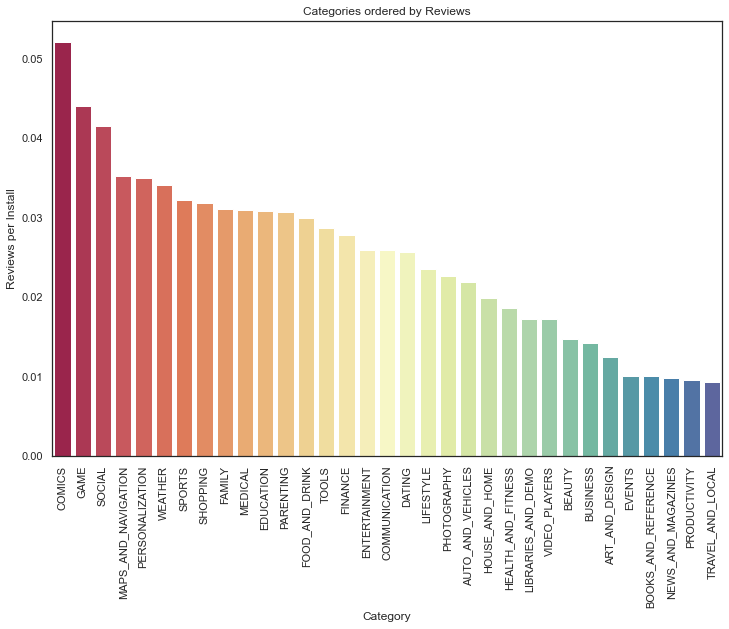

In [1067]:
plt.figure(figsize=(12,8))

sns.set_theme(style="white")
sns.barplot(data=df_reviews_byCat, x=df_reviews_byCat.index, y='Reviews_per_install', orient='v', palette='Spectral')

plt.title('Categories ordered by Reviews')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Reviews per Install')

plt.show()

#### Observations:

* We calculated a new field **'Reviews per install'** to use for this chart so as to not skew the results (some records have high number of installs and hence more reviews).
* **Comics** is the **most reviewed category** followed by **games and social media**.
* The **least reviewed categories** are **books, news, productivity and travel**.

### 4a) Frequency Distribution of Ratings on Playstore

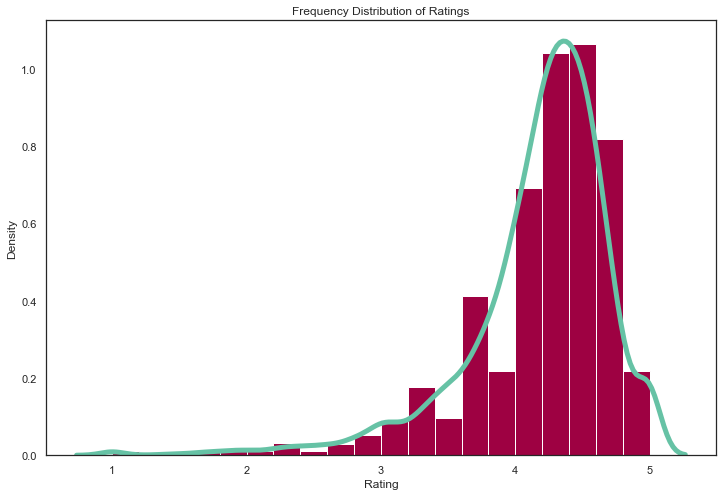

In [1068]:
plt.figure(figsize=(12,8))

sns.set_theme(style="white")

plt.hist(df['Rating'], bins=20, color='#9e0142', density=True)
sns.kdeplot(data=df['Rating'], color='#66c2a5', linewidth=5)
plt.title('Frequency Distribution of Ratings')
plt.xlabel('Rating')

plt.show()

#### Observations:

* The **most common rating** on playstore is between **4.5 and 4.6** as per this dataset.
* The distribution tells us that most ratings **range between 4 and 5**.
* **Ratings below 3 are low** in number which implies that people are generally content with apps.
* **Ratings around 1.5** are practically non-existent.

### 4b) Frequency Distribution of App Prices

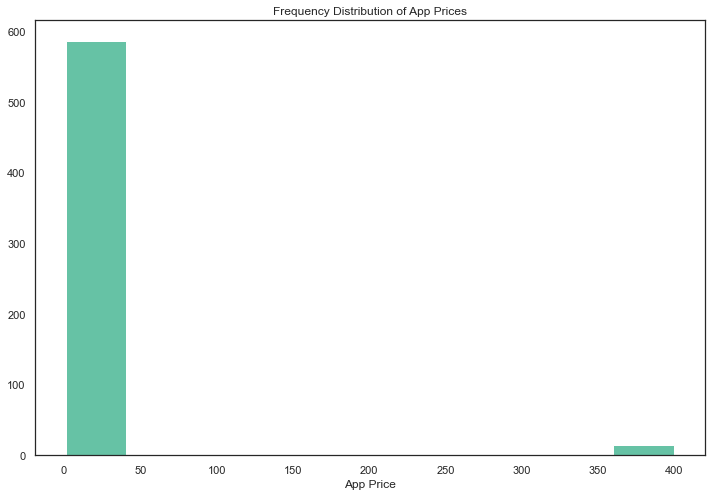

In [1069]:
plt.figure(figsize=(12,8))

sns.set_theme(style="white")

plt.hist(df[df['Price'] > 0]['Price'], color='#66c2a5')
plt.title('Frequency Distribution of App Prices')
plt.xlabel('App Price')

plt.show()

#### Observations:

* Of the paid apps, most apps have their prices in the range **1-45 USD**.
* About **14 apps** have a price of **>350 USD and <400 USD**.

### 4c) Frequency Distribution of App Sizes

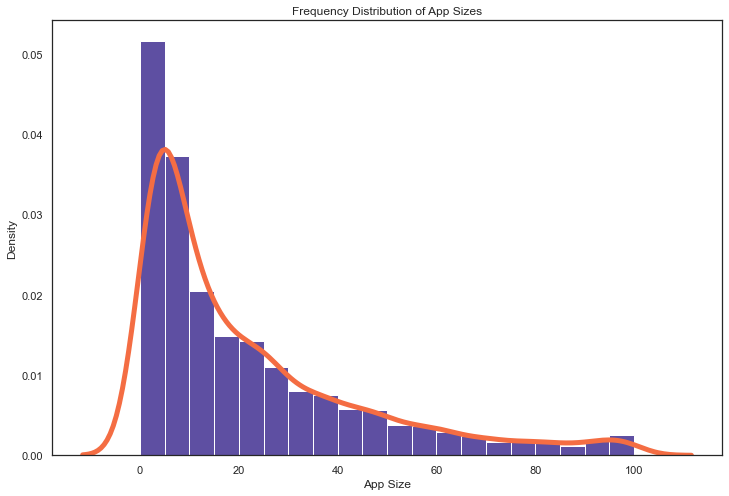

In [1070]:
plt.figure(figsize=(12,8))

sns.set_theme(style="white")

plt.hist(df['Size'], bins=20, color='#5e4fa2', density=True)
sns.kdeplot(data=df['Size'], color='#f46d43', linewidth=5)
plt.title('Frequency Distribution of App Sizes')
plt.xlabel('App Size')

plt.show()

#### Observations:

* Of the 8000+ apps in the dataset, **~4263 apps** have a size of **<20 MB**.
* About **14 apps** have a size of **100 MB** which is the maximum in this dataset.

### 5) Ratings vs. Number of Reviews

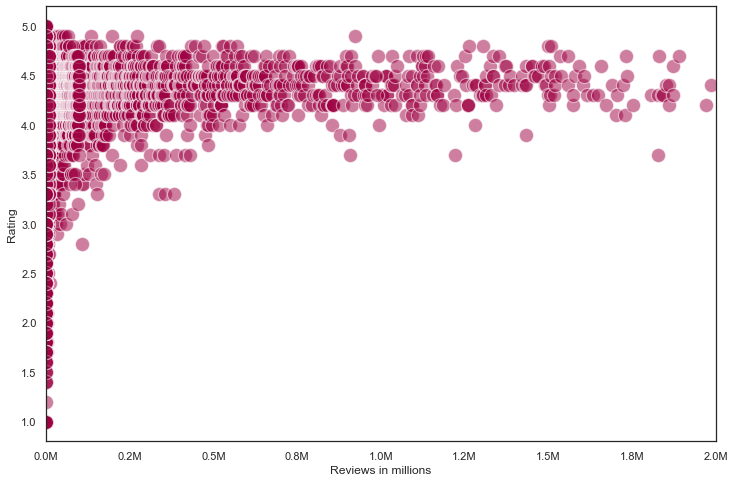

In [1071]:
plt.figure(figsize=(12,8))

g = sns.scatterplot(data=df, x='Reviews', y='Rating', s=200, alpha=0.5, color='#9e0142')

plt.xlim(0,2000000)
xlabels = ['{:,.1f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
plt.xlabel('Reviews in millions')

plt.show()

#### Observations:

* Most app ratings are in the range **3.5 and 5** as can be seen from the above graph.
* The apps which have **most number of reviews** are the apps rated in the approximate range of **4.25-4.75**. 
* For most apps, the number of reviews are **less than 0.5 million**.
* There are a few apps which have more than 4 million reviews and even close to 80 million reviews which we have treated as outliers in this chart.
* Not many apps have low ratings and less reviews.

### 6) Median Ratings of all App Categories with Lower and Upper Quartiles

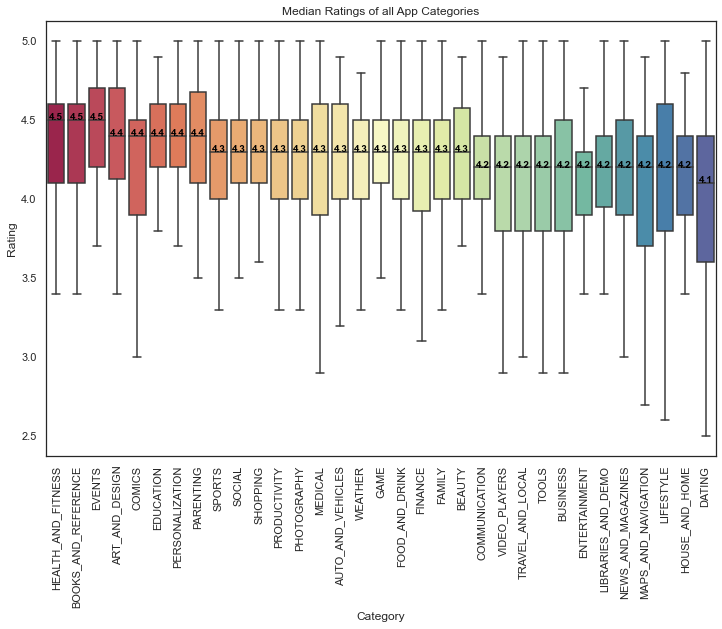

In [1072]:
plt.figure(figsize=(12,8))

medians = df.groupby(by=['Category'])['Rating'].median().sort_values(ascending=False)
my_order = medians[::1].index

sns.set_theme(style="white")
box_plot = sns.boxplot(data=df, y="Rating", x="Category", palette='Spectral', order=my_order, showfliers=False)

plt.title('Median Ratings of all App Categories')
plt.xticks(rotation=90)
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick], medians[xtick],
                  horizontalalignment='center',
                  size='small',color='black',weight='semibold')

plt.show()

#### Observations:

* The categories with the **highest median rating of 4.5** are **Health & Fitness, Books and Events**.
* The **lowest median rating** of a category in the dataset is **4.1 for Dating**.
* Barring outliers which have been removed from this plot, the **lowest rated app** also belongs to the **Dating** category.
* Some categories like **Education, Weather, Beauty and Maps** do not have a **single app rated 5 stars**.
* The **Entertainment** category has the **lowest upper quartile and the lowest maximum rating**.

### 7) Top 5 Most Reviewed App Categories based on Content Rating

In [1073]:
# Group by category and content rating and find reviews per install

df_reviews_bycatcontent= df.groupby(by=['Category', 'Content_Rating'], as_index=False)\
                           .sum()[['Category', 'Content_Rating', 'Installs', 'Reviews']]
df_reviews_bycatcontent['Reviews_per_install'] = df_reviews_bycatcontent.Reviews/df_reviews_bycatcontent.Installs

top5categories = df_reviews_bycatcontent.sort_values(by='Reviews_per_install', ascending=False).Category.head(n=5).to_list()

dftop5 = df_reviews_bycatcontent\
        .sort_values(by='Reviews_per_install', ascending=False)[df_reviews_bycatcontent['Category']\
        .isin(top5categories)]

dftop5.head(n=5)

,Category,Content_Rating,Installs,Reviews,Reviews_per_install
29,EDUCATION,Teen,1000000,256079,0.256079
83,PRODUCTIVITY,Mature 17+,1000,84,0.084000
102,TRAVEL_AND_LOCAL,Mature 17+,10000000,751551,0.075155
75,PERSONALIZATION,Everyone 10+,12510000,920999,0.073621
46,GAME,Everyone 10+,2404860000,145010478,0.060299


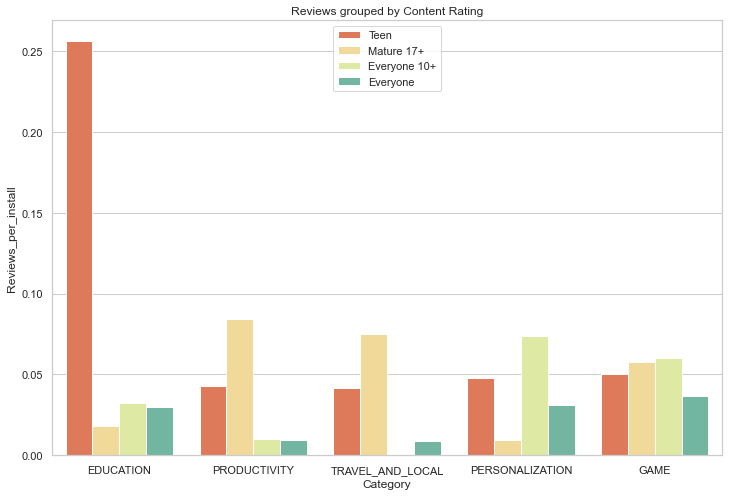

In [1074]:
plt.figure(figsize=(12,8))

sns.set_theme(style="whitegrid")
sns.barplot(
    data=dftop5,
    y="Reviews_per_install", x="Category",
    ci=None, 
    hue="Content_Rating",
    palette="Spectral",
    order=top5categories)

plt.title('Reviews grouped by Content Rating')
plt.legend(loc='upper center')

plt.show()

#### Observations:

* Taking reviews per install into consideration for this chart as well, **Education** seems to be **most reviewed by Teens** which seems accurate.
* **Games** category is almost equally reviewed by **all age groups**.
* **Productivity and Travel** are reviewed mostly by the **Mature 17+ category** followed by **Teens**.

### 8) Population pyramid of App Categories by Type

In [1075]:
# Group by Category and Type and find the count of apps in each Category and Type

df_catbytype = df.groupby(by=['Category', 'Type'], as_index=False)\
                .count()[['Category', 'Type', 'App']]\
                .sort_values(by='App', ascending=False)

# Divide the data into two data frames for Free and Paid App data

df_catbytype_free = df_catbytype[df_catbytype['Type']=='Free']
df_catbytype_paid = df_catbytype[df_catbytype['Type']=='Paid']
df_catbytype_paid['App'] = df_catbytype_paid['App']*-1  # To plot the data on the negative axis

df_catbytype.head(n=5)

,Category,Type,App
19,FAMILY,Free,1497
25,GAME,Free,820
53,TOOLS,Free,655
21,FINANCE,Free,289
31,LIFESTYLE,Free,283


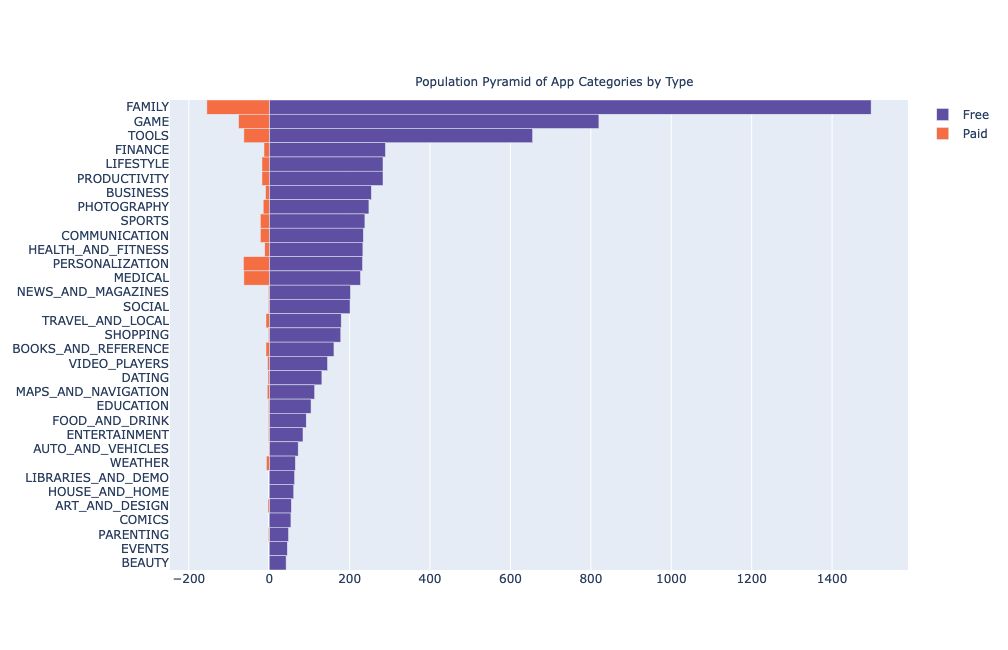

In [1076]:
fig = gp.Figure()
  
# Adding Free app data to the figure
fig.add_trace(gp.Bar(y=df_catbytype_free.Category, x=df_catbytype_free.App, 
                     name='Free', 
                     orientation='h',
                     marker={'color': '#5e4fa2'}))

# Adding Paid app data to the figure
fig.add_trace(gp.Bar(y=df_catbytype_paid.Category, x=df_catbytype_paid.App, 
                     name='Paid', 
                     orientation='h',
                     marker={'color': '#f46d43'}))

# Updating the layout
fig.update_layout(title={'text': "Population Pyramid of App Categories by Type",
                        'y':0.88,
                        'x':0.55,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                  title_font_size=12, barmode='relative',
                  bargap=0, bargroupgap = 0, height=650, width=800,
                  yaxis=dict(autorange='reversed'))

fig.show()

#### Observations:

* The population pyramid of app count clearly tells us that the **majority of apps** on the Playstore are **free**.
* Looking at the ratio of Free to Paid apps in all categories on Playstore, most number of apps as well as the **most number of paid apps** belong to the **Family** category.
* There are aboout **76 paid apps** in the **Game** category.
* **Tools, Personalization and Medical** also have about 60 paid apps.
* **Comics, Libraries, Home, Vehicles, Events and Beauty** categories only have **free apps**.

### 9) App Sizes vs. Installs

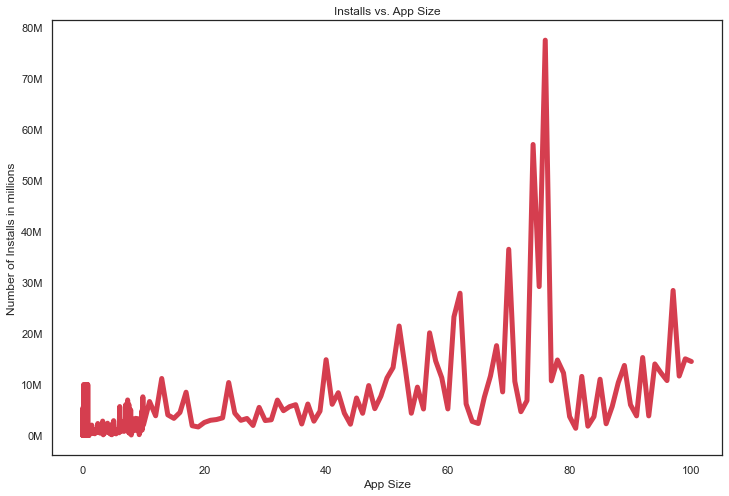

In [1077]:
plt.figure(figsize=(12,8))

sns.set_theme(style="white")
l = sns.lineplot(data=df, y='Installs', x='Size', ci=None, color='#d53e4f', linewidth=5)

ylabels = ['{:,.0f}'.format(y) + 'M' for y in l.get_yticks()/1000000]
l.set_yticklabels(ylabels)
plt.ylabel('Number of Installs in millions')
plt.xlabel('App Size')
plt.title('Installs vs. App Size')

plt.show()

#### Observations:

* Apps of around **70-80 MB** size have the **highest** number of installs **(~80M)**.
* Apps of **close to 100 MB** size have around **30M installs**.
* Apps of size **<10MB** are mostly downloaded lesser **(~<10M installs)**.